In [125]:
! pip install -U arrow

In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import arrow
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/briankosiadi/Capstone-1/master/avocado.csv')

In [249]:
# Dropping columns that I will not be using
avocado_df = df.drop(['Unnamed: 0', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1)

In [259]:
# Added a column Estimated Gross that outputs product of Average Price and Total Volume
avocado_df.insert(3, 'EstimatedGross', (avocado_df['AveragePrice'] * avocado_df['Total Volume']))

In [250]:
# Creating timestamp from Date which was a string type
avocado_df['timestamps'] = avocado_df['Date'].apply(lambda x: arrow.get(x).naive)

In [255]:
# create function that grouped dates into seasons
def check_season(date):
    if date.month in (12, 1, 2):
        return 'Winter'
    elif date.month in (3, 4, 5):
        return 'Spring'
    elif date.month in (6, 7, 8):
        return 'Summer'
    elif date.month in (9, 10, 11):
        return 'Autumn'

In [256]:
avocado_df['season'] = avocado_df['timestamps'].apply(check_season)

In [257]:
avocado_df.season.value_counts()

Winter    5075
Spring    4752
Autumn    4212
Summer    4210
Name: season, dtype: int64

In [22]:
avocado_df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

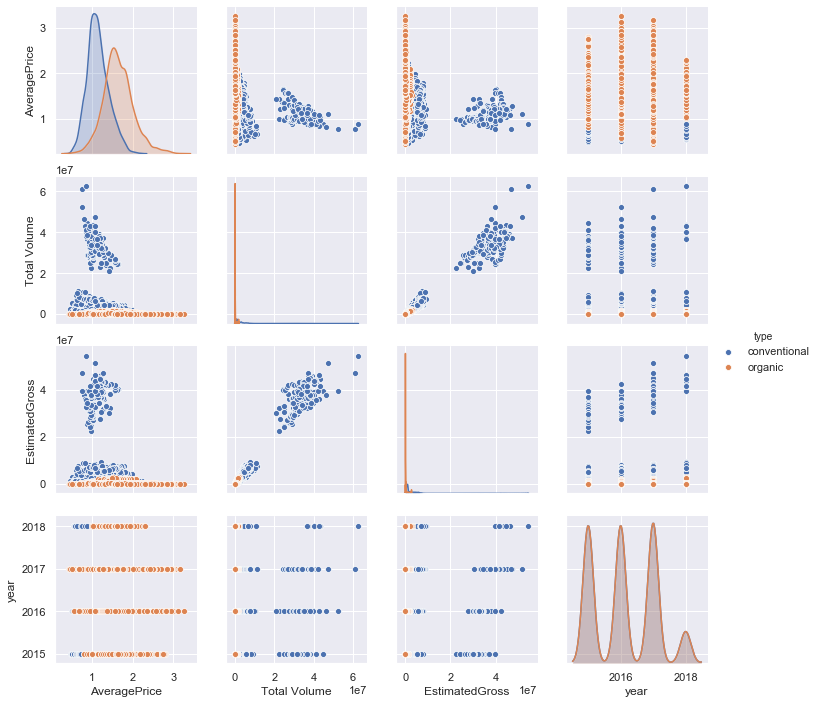

In [381]:
sns.pairplot(avocado_df, hue='type')

In [369]:
pd.concat([conventional_avocados, organic_avocados], axis=1).describe()

,AveragePrice,Total Volume,EstimatedGross,year,AveragePrice,Total Volume,EstimatedGross,year
count,9126.0000,9126.0000,9126.0000,9126.0000,9123.0000,9123.0000,9123.0000,9123.0000
mean,1.1580,1653212.8985,1781012.7598,2016.1479,1.6540,47811.2115,74603.5866,2016.1479
std,0.2630,4747891.8702,5066181.3608,0.9400,0.3635,142406.9017,221167.2284,0.9400
min,0.4600,33699.6800,43342.8752,2015.0000,0.4400,84.5600,134.4504,2015.0000
25%,0.9800,198908.6100,225717.7552,2015.0000,1.4200,4779.9100,7837.0078,2015.0000
50%,1.1300,408325.5300,485461.8132,2016.0000,1.6300,10835.7600,17152.6169,2016.0000
75%,1.3200,1030992.0475,1010742.7950,2017.0000,1.8700,30087.0450,49908.3989,2017.0000
max,2.2200,62505646.5200,54379912.4724,2018.0000,3.2500,1814929.9700,2758693.5544,2018.0000


In [315]:
# I noticed that conventional avocados contributed to a vast majority of the two types of avocados, and because of the
# very different and non-normal trends from organic avocados, I decided to separate the two to just use conventional avocados
conventional_avocados = avocado_df.loc[avocado_df['type']=='conventional']
organic_avocados = avocado_df.loc[avocado_df['type']=='organic']

In [351]:
# From regions, I categorized regions into the five main regions
region_filter = ['Midsouth', 'Northeast', 'SouthCentral', 'Southeast', 'West']
avocado_by_region = conventional_avocados[conventional_avocados['region'].isin(region_filter)]

DescribeResult(nobs=845, minmax=(0.62, 1.82), mean=1.1138224852071006, variance=0.05888880731372165, skewness=0.4236718234219661, kurtosis=-0.37216599768320524)

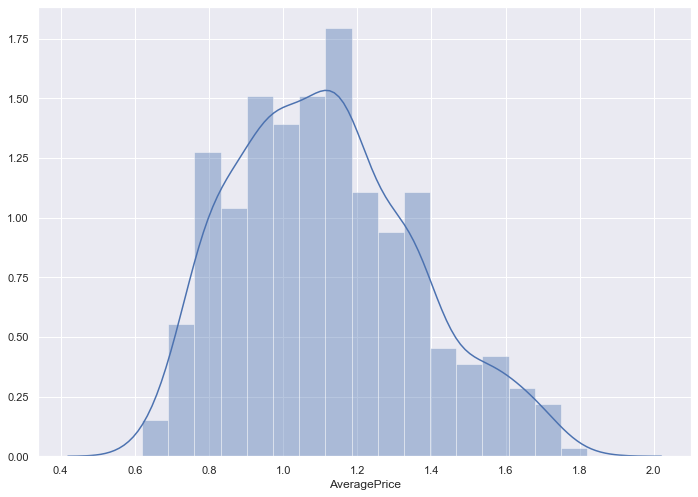

In [322]:
# Distribution of Average Price can be considered as normal
sns.distplot(avocado_by_region['AveragePrice'])
stats.describe(avocado_by_region['AveragePrice'])

In [330]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Average Price between regions
stats.f_oneway(avocado_by_region.loc[avocado_by_region['region']=='Midsouth']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='Northeast']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='SouthCentral']['AveragePrice'],
               avocado_by_region.loc[avocado_by_region['region']=='Southeast']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='West']['AveragePrice'])

F_onewayResult(statistic=192.42589094588556, pvalue=4.6666350132714866e-117)

In [382]:
# Tukey-HSD test shows one-to-one comparisons, almost all regions have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['AveragePrice'], groups=avocado_by_region['region'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Midsouth,Northeast,0.1373,0.001,0.085,0.1895,True
Midsouth,SouthCentral,-0.3378,0.001,-0.39,-0.2855,True
Midsouth,Southeast,-0.0441,0.1428,-0.0964,0.0081,False
Midsouth,West,-0.2221,0.001,-0.2743,-0.1698,True
Northeast,SouthCentral,-0.475,0.001,-0.5273,-0.4228,True
Northeast,Southeast,-0.1814,0.001,-0.2337,-0.1292,True
Northeast,West,-0.3593,0.001,-0.4116,-0.3071,True
SouthCentral,Southeast,0.2936,0.001,0.2414,0.3459,True
SouthCentral,West,0.1157,0.001,0.0634,0.1679,True
Southeast,West,-0.1779,0.001,-0.2302,-0.1257,True


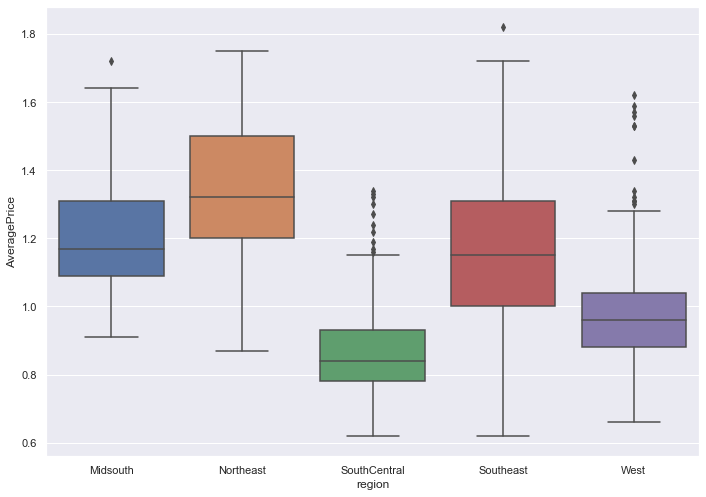

In [325]:
# From the box plot we can observe visually price ranges for each region
sns.boxplot(x='region', y='AveragePrice', data=avocado_by_region)

In [338]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Average Price between seasons
stats.f_oneway(avocado_by_region.loc[avocado_by_region['season']=='Summer']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['season']=='Autumn']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['season']=='Winter']['AveragePrice'],
               avocado_by_region.loc[avocado_by_region['season']=='Spring']['AveragePrice'])

F_onewayResult(statistic=35.746293200129585, pvalue=9.511007725926344e-22)

In [339]:
# Tukey-HSD test shows one-to-one comparisons, all seasons have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['AveragePrice'], groups=avocado_by_region['season'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,-0.1579,0.001,-0.2159,-0.1,True
Autumn,Summer,-0.0759,0.006,-0.1356,-0.0163,True
Autumn,Winter,-0.215,0.001,-0.2721,-0.1579,True
Spring,Summer,0.082,0.0016,0.024,0.14,True
Spring,Winter,-0.057,0.0402,-0.1123,-0.0018,True
Summer,Winter,-0.139,0.001,-0.1961,-0.0819,True


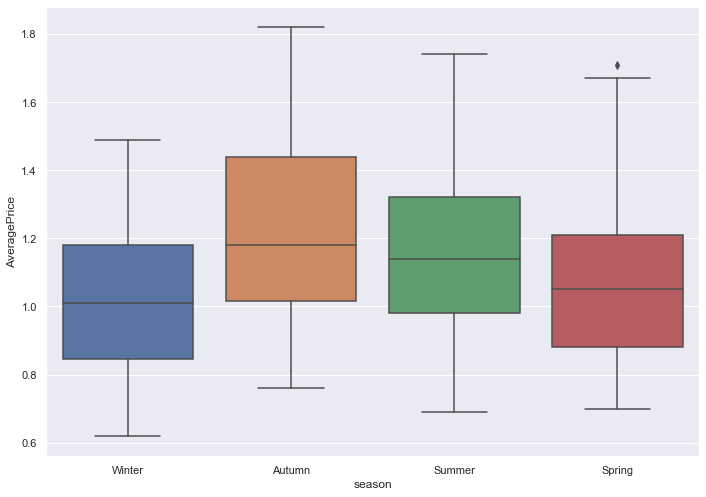

In [340]:
# From the box plot we can observe visually price ranges for each season
sns.boxplot(x='season', y='AveragePrice', data=avocado_by_region)

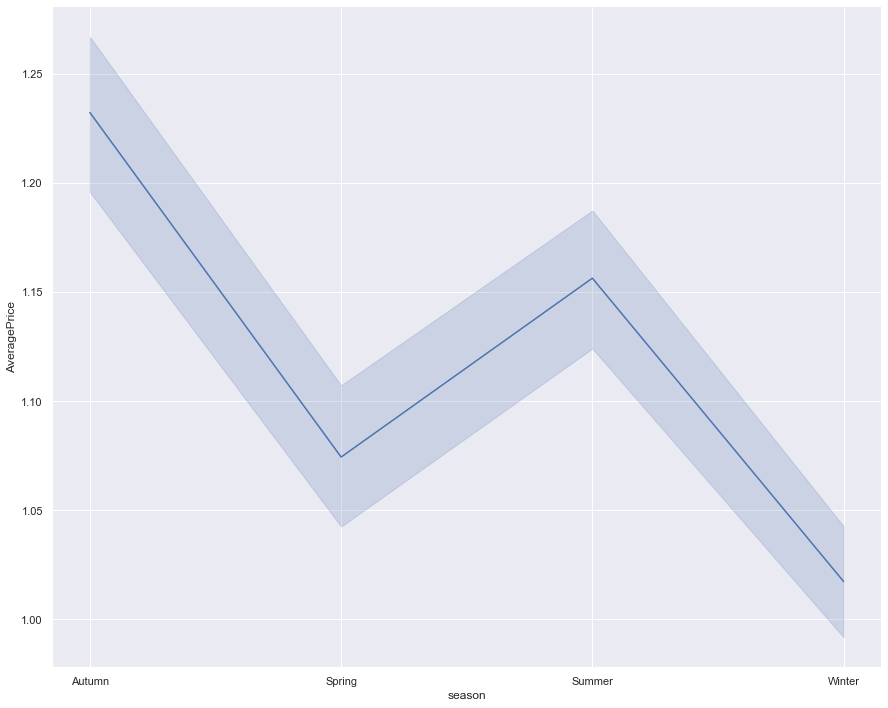

In [380]:
# We can see the correlation between price and season here
sns.relplot(x='season', y='AveragePrice', kind='line', data=avocado_by_region, height=10, aspect=1.25)

<Figure size 576x288 with 0 Axes>

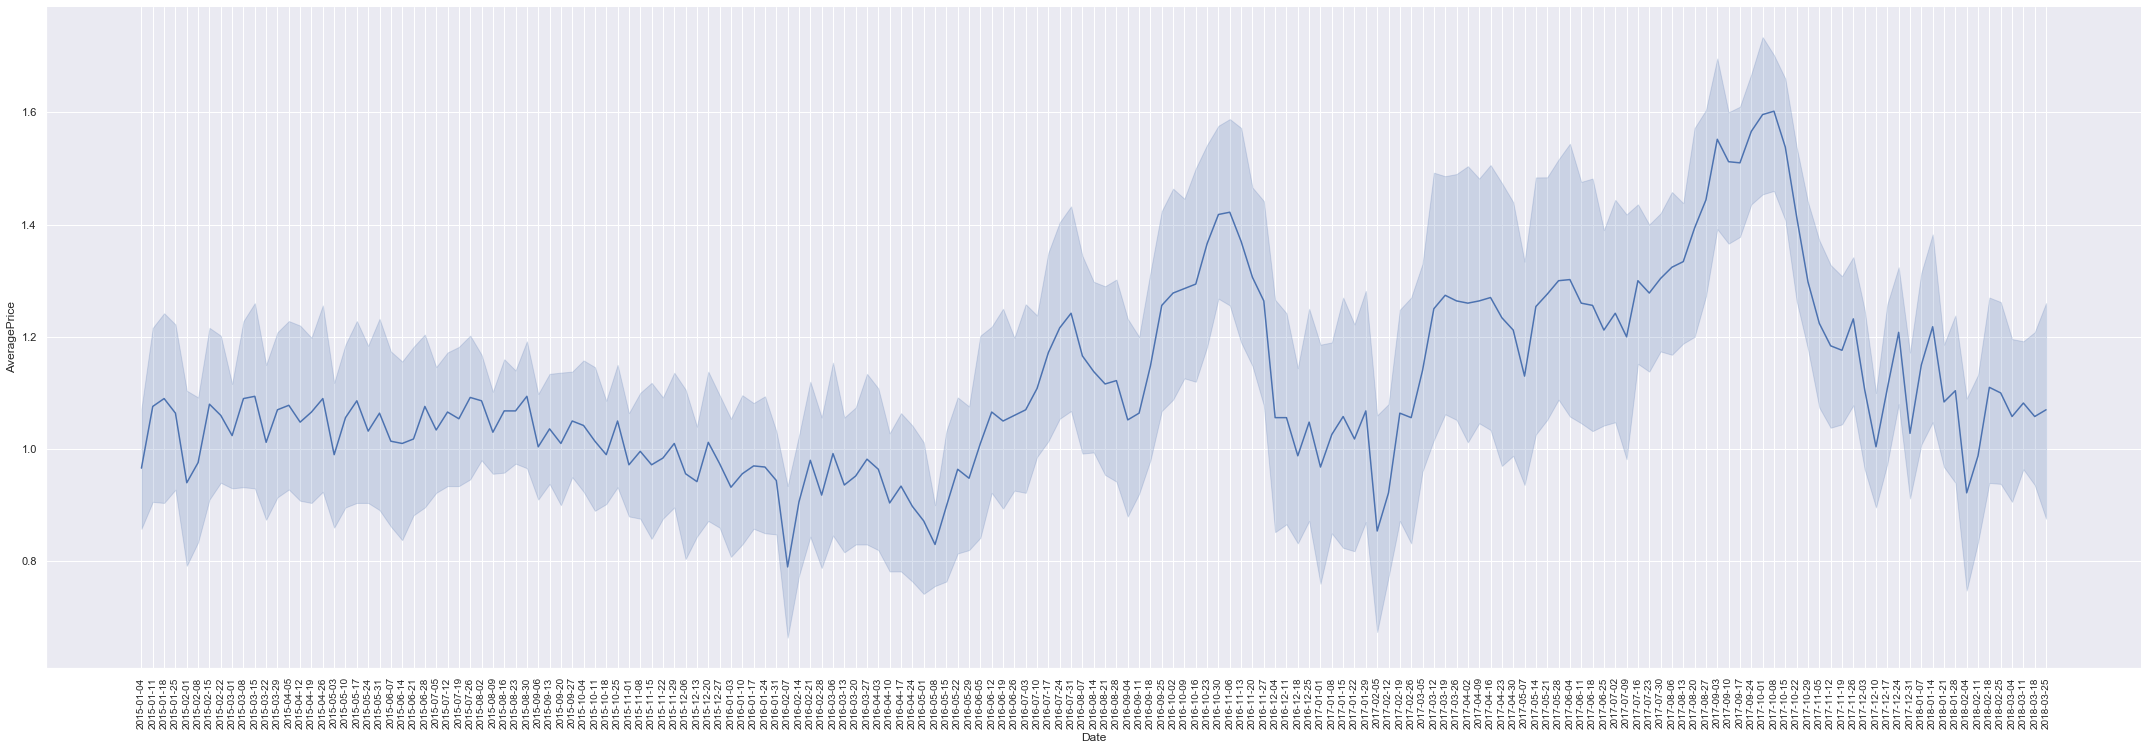

In [379]:
# This plot shows the correlation above in a cyclical manner over the course of several years
plt.figure(figsize=(8,4))
cx = sns.relplot(x='Date', y='AveragePrice', kind='line', data=avocado_by_region, height=10, aspect=3)
cx.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

DescribeResult(nobs=845, minmax=(1845443.13, 11274749.11), mean=4529164.7657988155, variance=2524292644867.2637, skewness=0.6027532915620293, kurtosis=-0.09028622047996038)

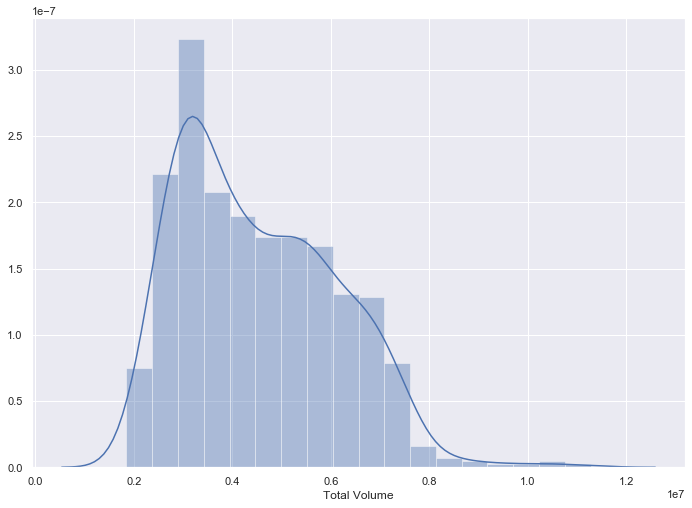

In [326]:
# Distribution of Total Volume can be considered as normal
sns.distplot(avocado_by_region['Total Volume'])
stats.describe(avocado_by_region['Total Volume'])

In [331]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Total Volume sold between regions
stats.f_oneway(avocado_by_region.loc[avocado_by_region['region']=='Midsouth']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['region']=='Northeast']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['region']=='SouthCentral']['Total Volume'],
               avocado_by_region.loc[avocado_by_region['region']=='Southeast']['AveragePrice'],
              avocado_by_region.loc[avocado_by_region['region']=='West']['Total Volume'])

F_onewayResult(statistic=1607.3164107397326, pvalue=0.0)

In [328]:
# Tukey-HSD test shows one-to-one comparisons, all regions have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['Total Volume'], groups=avocado_by_region['region'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Midsouth,Northeast,1175656.1962,0.001,901766.8807,1449545.5116,True
Midsouth,SouthCentral,2975102.0014,0.001,2701212.686,3248991.3169,True
Midsouth,Southeast,679466.4905,0.001,405577.175,953355.8059,True
Midsouth,West,3307643.0368,0.001,3033753.7214,3581532.3522,True
Northeast,SouthCentral,1799445.8053,0.001,1525556.4898,2073335.1207,True
Northeast,Southeast,-496189.7057,0.001,-770079.0211,-222300.3902,True
Northeast,West,2131986.8407,0.001,1858097.5252,2405876.1561,True
SouthCentral,Southeast,-2295635.5109,0.001,-2569524.8264,-2021746.1955,True
SouthCentral,West,332541.0354,0.0083,58651.7199,606430.3508,True
Southeast,West,2628176.5463,0.001,2354287.2309,2902065.8618,True


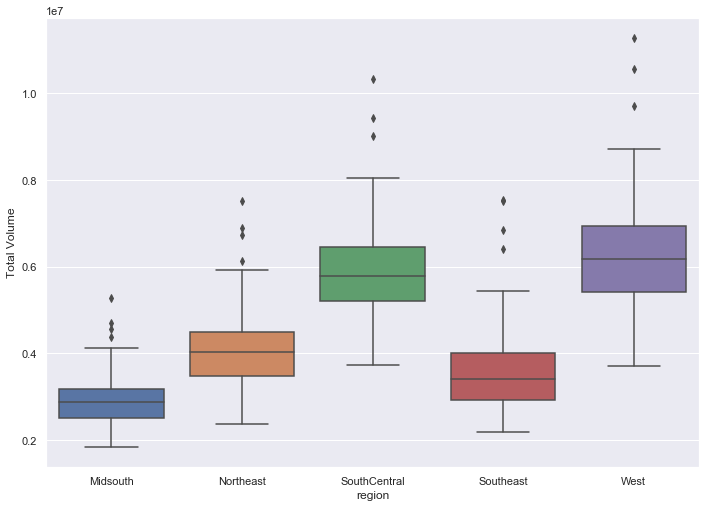

In [329]:
# sales are highest in west and south central regions
sns.boxplot(x='region', y='Total Volume', data=avocado_by_region)

In [341]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in total volume between seasons
stats.f_oneway(avocado_by_region.loc[avocado_by_region['season']=='Summer']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['season']=='Autumn']['Total Volume'],
              avocado_by_region.loc[avocado_by_region['season']=='Winter']['Total Volume'],
               avocado_by_region.loc[avocado_by_region['season']=='Spring']['Total Volume'])

F_onewayResult(statistic=22.75506695347238, pvalue=3.597694426896586e-14)

In [343]:
# Tukey-HSD test shows one-to-one comparisons, and that Autumn stands out form the other seasons.
# This si also corroborated by the fact that Autumn has the highest average price of all the seasons.
pairwise_tukeyhsd(endog=avocado_by_region['Total Volume'], groups=avocado_by_region['season'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,1121036.4412,0.001,733480.5734,1508592.309,True
Autumn,Summer,806119.1948,0.001,407060.6572,1205177.7323,True
Autumn,Winter,1038814.5721,0.001,657114.7958,1420514.3484,True
Spring,Summer,-314917.2464,0.1567,-702473.1142,72638.6214,False
Spring,Winter,-82221.8691,0.9,-451879.2152,287435.477,False
Summer,Winter,232695.3773,0.3981,-149004.399,614395.1536,False


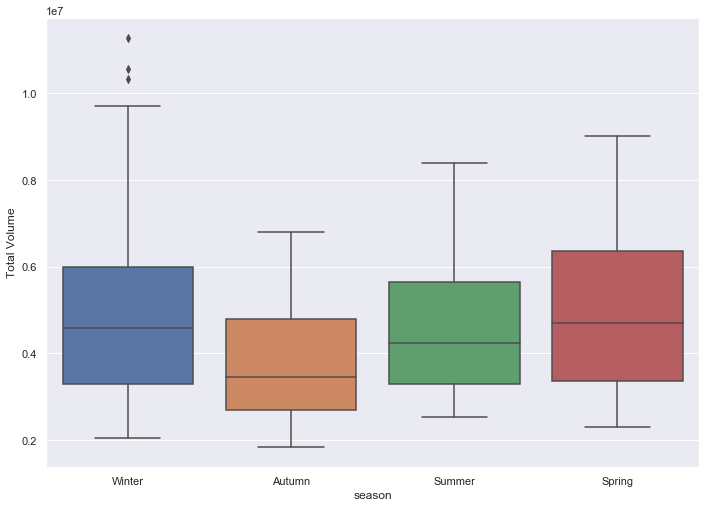

In [342]:
# Boxplot also suggests Autumn has significant difference from the the other seasons in total volume sales
sns.boxplot(x='season', y='Total Volume', data=avocado_by_region)

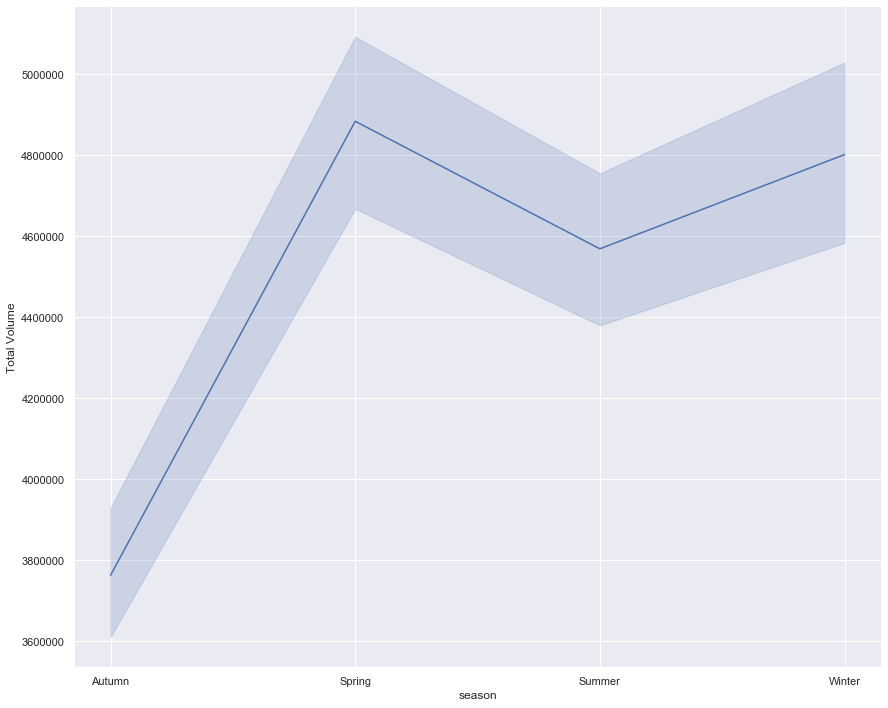

In [375]:
# Relational plot shows total volume sales in Autumn significantly lower than the other seasons.
sns.relplot(x='season', y='Total Volume', kind='line', data=avocado_by_region, height=10, aspect=1.25)

<Figure size 576x288 with 0 Axes>

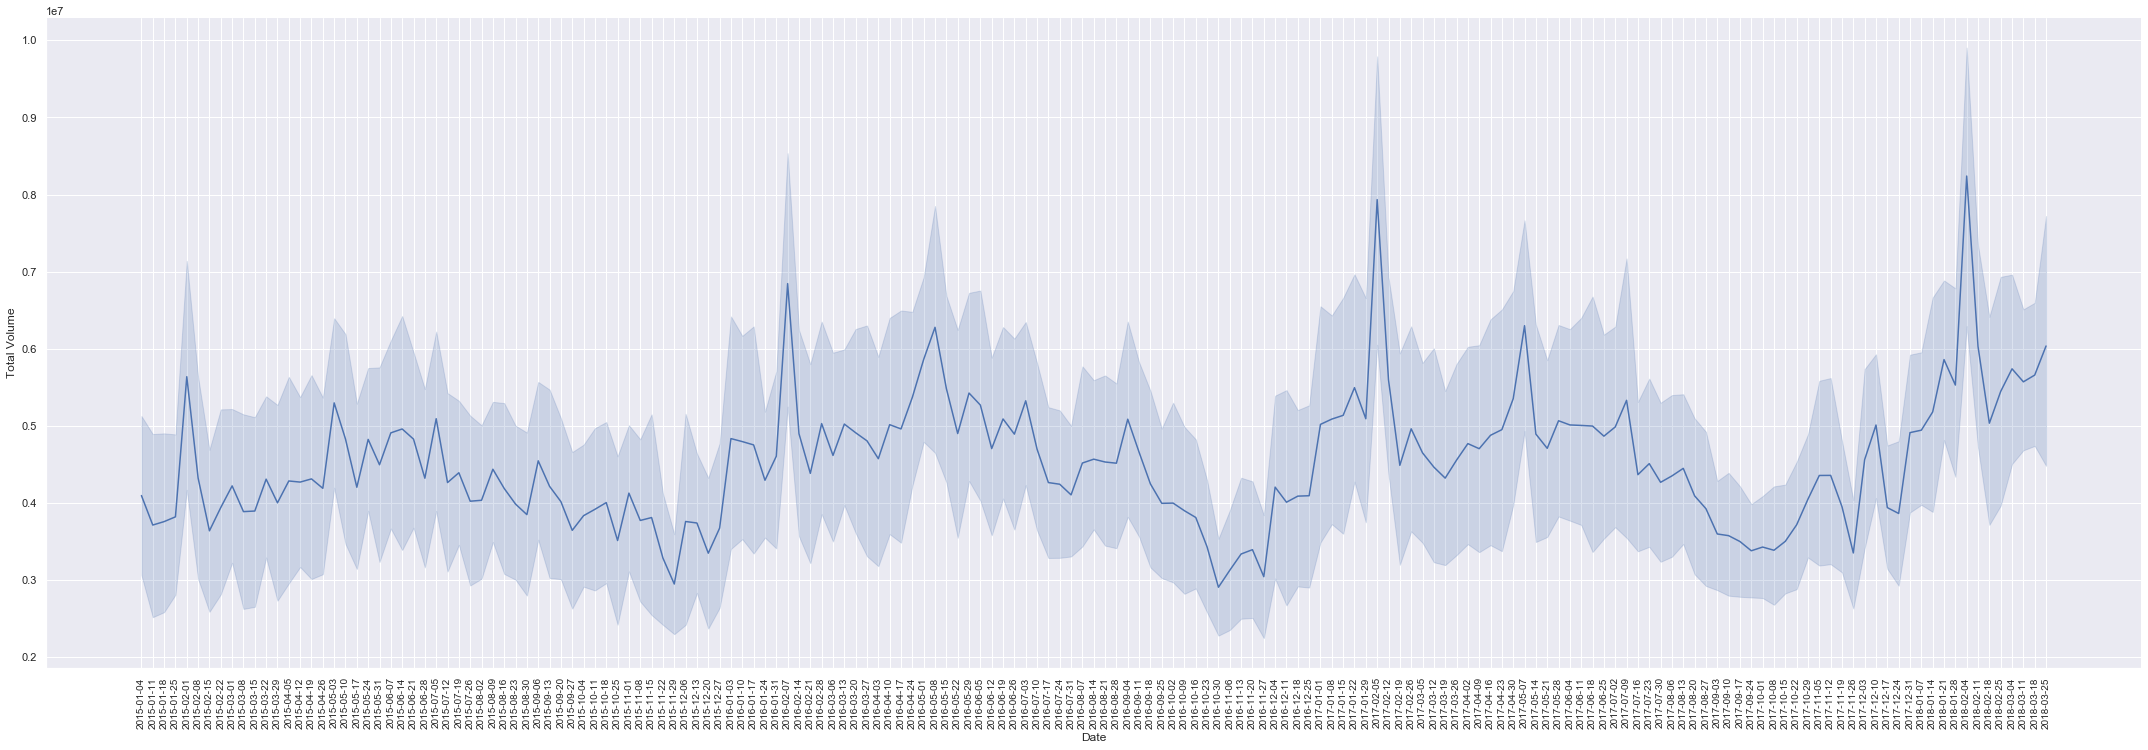

In [378]:
# Once again, we can see week to week data on total volume plotted.
plt.figure(figsize=(8,4))
bx = sns.relplot(x='Date', y='Total Volume', kind='line', data=avocado_by_region, height=10, aspect=3)
bx.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

DescribeResult(nobs=845, minmax=(1937715.2865, 9160553.3294), mean=4795982.046982013, variance=1507870262076.1323, skewness=0.22637293414747928, kurtosis=-0.3747679117437155)

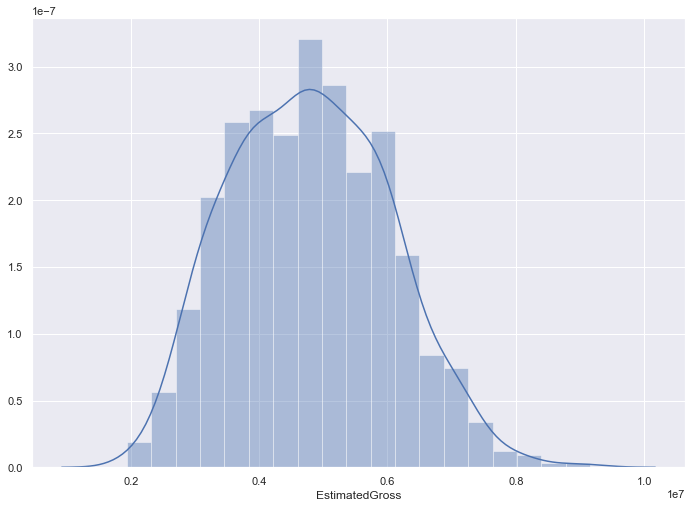

In [320]:
sns.distplot(avocado_by_region['EstimatedGross'])
stats.describe(avocado_by_region['EstimatedGross'])
# Distribution of Estimated Gross can be considered as normal

In [344]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Estimated Gross between regions
stats.f_oneway(avocado_by_region.loc[avocado_by_region['region']=='Midsouth']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['region']=='Northeast']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['region']=='SouthCentral']['EstimatedGross'],
               avocado_by_region.loc[avocado_by_region['region']=='Southeast']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['region']=='West']['EstimatedGross'])

F_onewayResult(statistic=12.445545465950943, pvalue=5.720060294873973e-08)

In [336]:
# Tukey-HSD test shows one-to-one comparisons, all regions have significant differences compared to one another
pairwise_tukeyhsd(endog=avocado_by_region['EstimatedGross'], groups=avocado_by_region['region'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Midsouth,Northeast,1947515.2761,0.001,1702048.2101,2192982.342,True
Midsouth,SouthCentral,1560109.5158,0.001,1314642.4499,1805576.5818,True
Midsouth,Southeast,595530.581,0.001,350063.515,840997.6469,True
Midsouth,West,2513931.2365,0.001,2268464.1706,2759398.3025,True
Northeast,SouthCentral,-387405.7603,0.001,-632872.8262,-141938.6943,True
Northeast,Southeast,-1351984.6951,0.001,-1597451.7611,-1106517.6292,True
Northeast,West,566415.9604,0.001,320948.8945,811883.0264,True
SouthCentral,Southeast,-964578.9349,0.001,-1210046.0008,-719111.8689,True
SouthCentral,West,953821.7207,0.001,708354.6548,1199288.7866,True
Southeast,West,1918400.6556,0.001,1672933.5896,2163867.7215,True


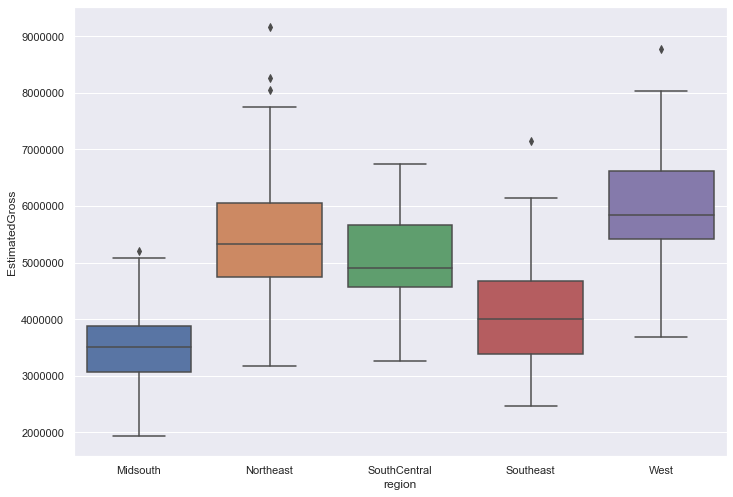

In [335]:
# Boxplot shows that west has highest amount of gross sales, and midsouth with the lowest.
sns.boxplot(x='region', y='EstimatedGross', data=avocado_by_region)

In [345]:
# 1-way ANOVA rejects null hypothesis, suggesting that there is a significant difference in Estimated Gross between seasons
stats.f_oneway(avocado_by_region.loc[avocado_by_region['season']=='Summer']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['season']=='Autumn']['EstimatedGross'],
              avocado_by_region.loc[avocado_by_region['season']=='Winter']['EstimatedGross'],
               avocado_by_region.loc[avocado_by_region['season']=='Spring']['EstimatedGross'])

F_onewayResult(statistic=12.445545465950943, pvalue=5.720060294873973e-08)

In [352]:
# Tukey-HSD test shows one-to-one comparisons, as well as mean difference in estimated gross sales as a usable output.
pairwise_tukeyhsd(endog=avocado_by_region['EstimatedGross'], groups=avocado_by_region['season'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Autumn,Spring,540394.7673,0.001,235632.4691,845157.0656,True
Autumn,Summer,644022.5226,0.001,330214.8703,957830.175,True
Autumn,Winter,198363.2127,0.3237,-101794.031,498520.4564,False
Spring,Summer,103627.7553,0.794,-201134.5429,408390.0536,False
Spring,Winter,-342031.5546,0.0135,-632718.9928,-51344.1164,True
Summer,Winter,-445659.3099,0.001,-745816.5537,-145502.0662,True


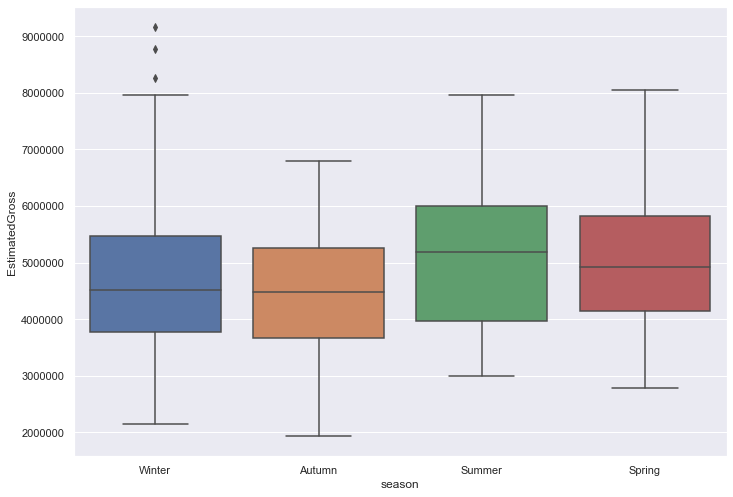

In [353]:
sns.boxplot(x='season', y='EstimatedGross', data=avocado_by_region)

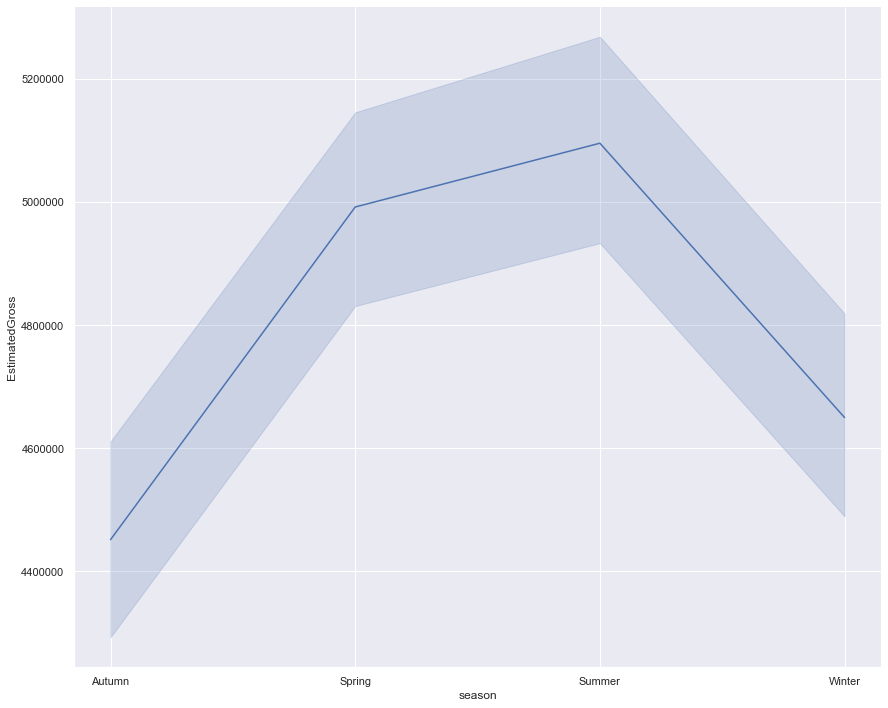

In [357]:
# Though Autumn had highest price and Winter had highest volume sales, Summer and Spring had the highest gross sales.
sns.relplot(x='season', y='EstimatedGross', kind='line', data=avocado_by_region, height=10, aspect=1.25)

<Figure size 576x288 with 0 Axes>

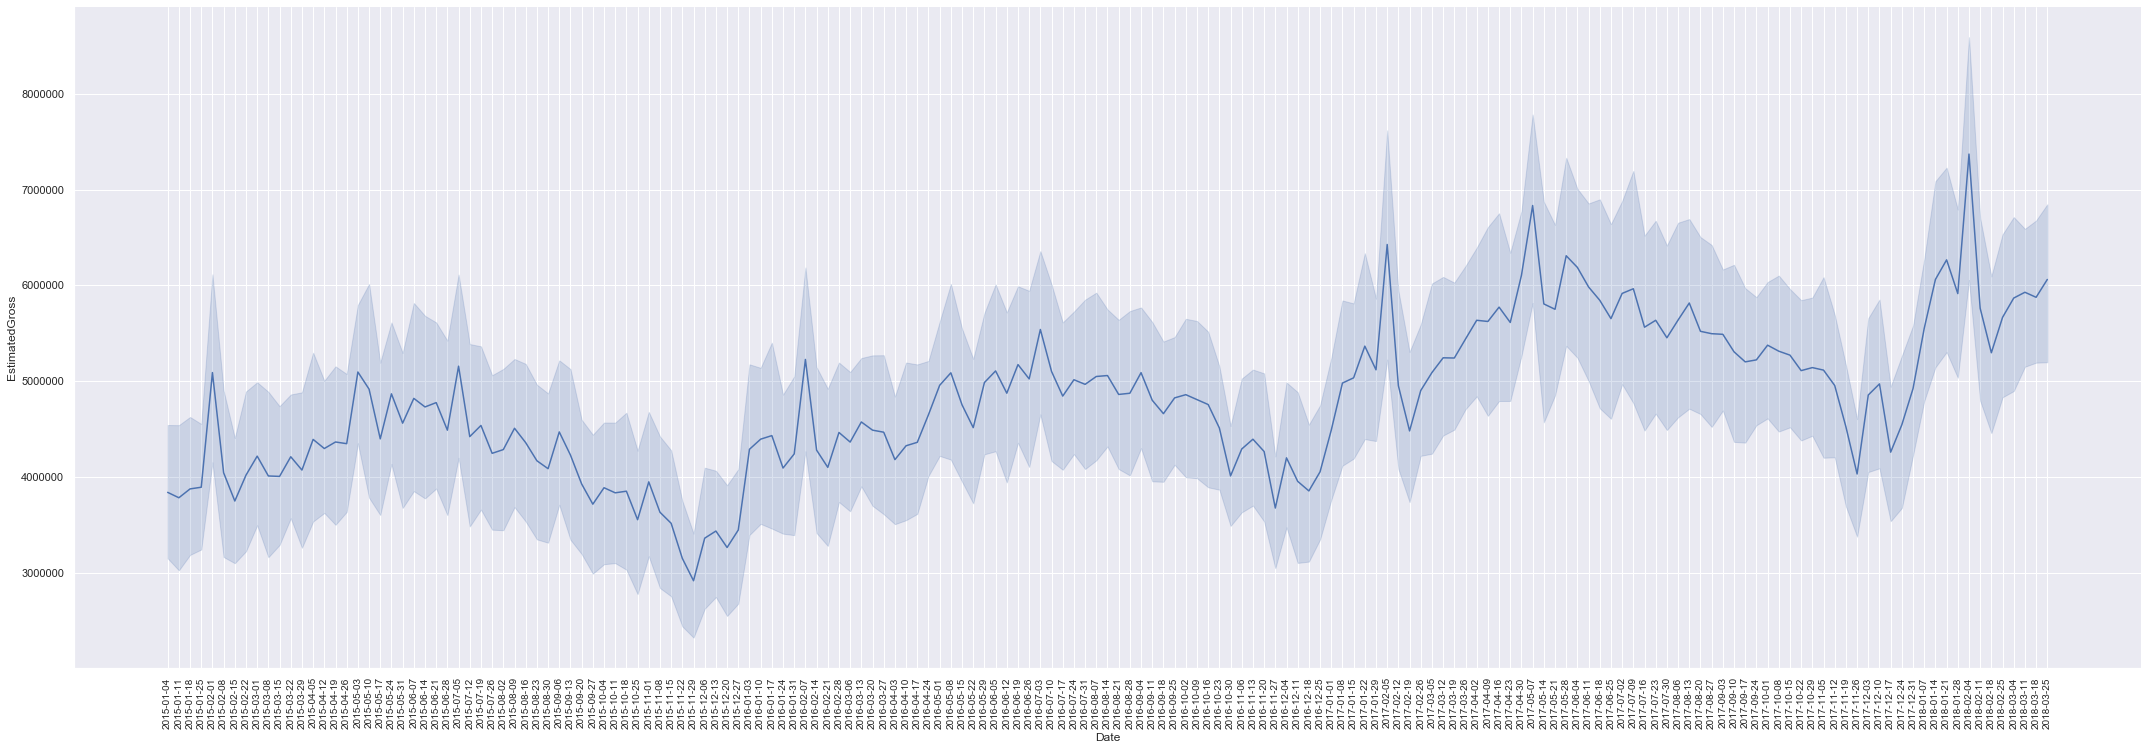

In [376]:
plt.figure(figsize=(8,4))
cx = sns.relplot(x='Date', y='EstimatedGross', kind='line', data=avocado_by_region, height=10, aspect=3)
cx.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()